In [ ]:
from keras.datasets import mnist
import tensorflow as tf
import numpy as np
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_train = x_train.reshape(len(x_train), np.prod(x_train.shape[1:]))
x_test = x_test.reshape(len(x_test), np.prod(x_test.shape[1:]))

In [ ]:
x_train.shape

(60000, 784)

In [ ]:
# Normalize the pixel values
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [ ]:
# Add noise
noise_factor=0.8
x_train_noisy = x_train + noise_factor * np.random.normal(loc = 0.0, scale = 1.0, size = x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc = 0.0, scale = 1.0, size = x_test.shape)

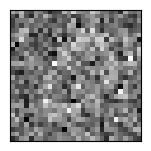

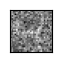

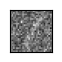

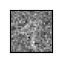

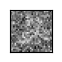

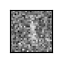

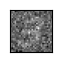

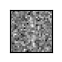

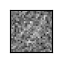

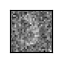

In [ ]:
# plot the noisy images
import matplotlib.pyplot as plt
n=10
plt.figure(figsize=(20,2))
for i in range (1,n+1):
  ax=plt.subplot(1,n,i)
  plt.imshow(x_train_noisy[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  plt.show()

In [ ]:
from keras import layers
from keras import regularizers
import keras
input_img = keras.Input(shape = (784, ))
encoded = layers.Dense(512, activation = 'relu', bias_regularizer = regularizers.l1(1e-9))(input_img)
encoded = layers.Dense(256, activation = 'relu')(encoded)
encoded = layers.Dense(128, activation = 'relu')(encoded)
encoded = layers.Dense(32, activation = 'relu')(encoded)
encoded = layers.Dense(128, activation = 'relu')(encoded)
encoded = layers.Dense(256, activation = 'relu')(encoded)
encoded = layers.Dense(512, activation = 'relu', bias_regularizer = regularizers.l1(1e-9))(encoded)
decoded = layers.Dense(784, activation = 'relu')(encoded)
autoencoder = keras.Model(input_img, decoded)

In [ ]:
autoencoder.compile(optimizer = 'adam', loss = 'mse')
history = autoencoder.fit(x_train_noisy, x_train_noisy, epochs = 20, batch_size = 256, shuffle = True, validation_data = (x_test_noisy, x_test_noisy))

Epoch 1/20
235/235 [==============================] - 4s 6ms/step - loss: 0.6779 - val_loss: 0.6593
Epoch 2/20
235/235 [==============================] - 1s 6ms/step - loss: 0.6554 - val_loss: 0.6527
Epoch 3/20
235/235 [==============================] - 2s 7ms/step - loss: 0.6511 - val_loss: 0.6502
Epoch 4/20
235/235 [==============================] - 2s 7ms/step - loss: 0.6488 - val_loss: 0.6491
Epoch 5/20
235/235 [==============================] - 1s 6ms/step - loss: 0.6473 - val_loss: 0.6484
Epoch 6/20
235/235 [==============================] - 1s 6ms/step - loss: 0.6462 - val_loss: 0.6475
Epoch 7/20
235/235 [==============================] - 1s 6ms/step - loss: 0.6449 - val_loss: 0.6469
Epoch 8/20
235/235 [==============================] - 1s 6ms/step - loss: 0.6441 - val_loss: 0.6466
Epoch 9/20
235/235 [==============================] - 1s 6ms/step - loss: 0.6434 - val_loss: 0.6469
Epoch 10/20
235/235 [==============================] - 1s 6ms/step - loss: 0.6428 - val_loss: 0.6464

In [ ]:
encoder = keras.Model(input_img, encoded)
decoder = keras.Model(encoded, decoded)

In [ ]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)
encoded_imgs.mean()

313/313 [==============================] - 1s 2ms/step


0.08595672

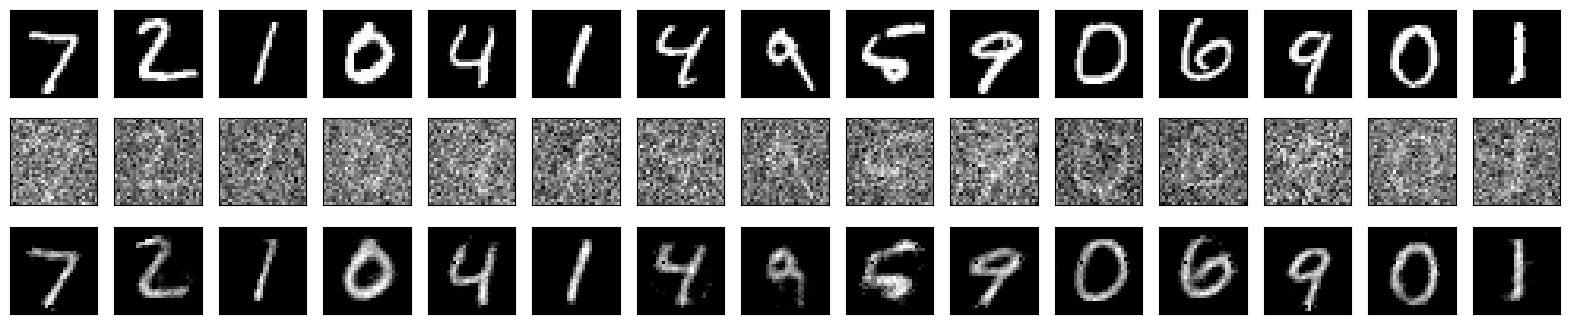

In [ ]:
import matplotlib.pyplot as plt
n=15
plt.figure(figsize=(20,4))
for i in  range(n):
  #display regular digits
  ax=plt.subplot(3,n,i+1)
  plt.imshow(x_test[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  #display noisy digits
  ax=plt.subplot(3,n,i+1+n)
  plt.imshow(x_test_noisy[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  #display reconstructed digits
  ax=plt.subplot(3,n,i+1+2*n)
  plt.imshow(decoded_imgs[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()